In [1]:
#import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read the dataset
data = pd.read_csv('DS_dataset.csv')

##### Understand the data

In [3]:
data.head()

,Customer_ID,Var1,Var2,Group,Category,Rating,Purchased_ABC_product
0,5518,41.534,12.123,G1,C1,Bronze,0
1,40515,9.445,0.256,G1,C1,Bronze,0
2,52697,37.599,3.199,G1,C2,Gold,0
3,68202,81.514,1.645,G1,C1,Silver,0
4,130003,46.805,1.706,G1,C1,Silver,0


In [4]:
data.shape

(30829, 7)

- The data consists of 30829 observations and 7 characteristics out of which one is dependent. 
###### Understanding the variables/features

In [5]:
data.columns

Index(['Customer_ID', 'Var1', 'Var2', 'Group', 'Category', 'Rating',
       'Purchased_ABC_product'],
      dtype='object')

These are the features present in the dataset
- Customer_ID: Unique identification number given to each individual customer; 
- Var1: Continuous numeric data holding some information about the customer
- Var2: Continuous numeric data holding some information about the customer
- Group: Nominal data regarding the group to which a customer belongs 
- Category: Nominal data about which category a customer belongs
- Rating: Ordinal data given to customers based on some past behaviour 
- Purchases_ABC_product: Discrete data about the product being purchased or not by a customer

#### Exploratory Data Analysis

In [6]:
data.describe()

,Customer_ID,Var1,Var2,Purchased_ABC_product
count,3.082900e+04,30829.000000,30829.000000,30829.000000
mean,3.057482e+06,64.868318,4.994489,0.503552
std,2.210470e+06,114.373345,9.533546,0.499995
min,6.470000e+02,0.251000,0.000000,0.000000
25%,1.501804e+06,13.256000,0.668000,0.000000
50%,2.192582e+06,31.860000,2.189000,1.000000
75%,4.732076e+06,68.702000,5.482000,1.000000
max,7.285914e+06,2909.776000,317.380000,1.000000


Observations:
- The mean value is greater than median for Var1 and Var2 showing it is positively skewed.
- The maximum value is so much greater than the 75th percentile indicating the precence of outliers in Var1 and Var2
- The mean of the purchsed abc product value shows it is balanced dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30829 entries, 0 to 30828
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            30829 non-null  int64  
 1   Var1                   30829 non-null  float64
 2   Var2                   30829 non-null  float64
 3   Group                  30829 non-null  object 
 4   Category               30829 non-null  object 
 5   Rating                 30829 non-null  object 
 6   Purchased_ABC_product  30829 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB


- The dataset has int, float and object datatypes. There are no missing values in any variable


In [8]:
data['Customer_ID'].nunique()

30829

- There is a total of 30829 customer ID's present meaning no duplicates or missing values as it is same as the total observations

<AxesSubplot:xlabel='Var2'>

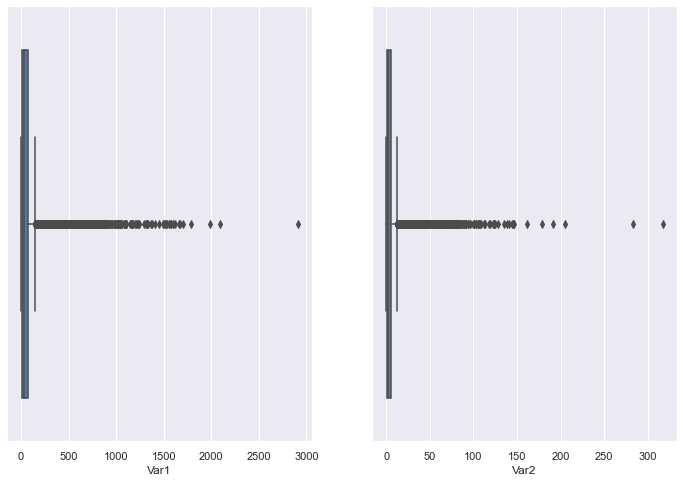

In [10]:
plt.rcParams['figure.figsize'] = [12,8]
sns.set(font_scale=1)
plt.subplot(1,2,1)
sns.boxplot(x='Var1',data=data)

plt.subplot(1,2,2)
sns.boxplot(x='Var2',data=data)    

- Both var1, var2 have few outliers. 

<AxesSubplot:xlabel='Var2', ylabel='Count'>

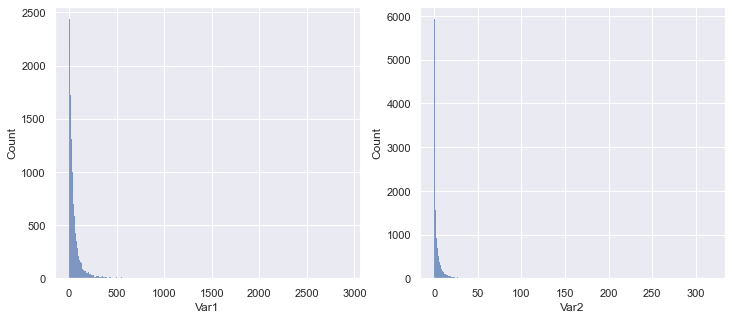

In [11]:
plt.rcParams['figure.figsize'] = [12,5]
plt.subplot(1,2,1)
sns.histplot(data['Var1'])

plt.subplot(1,2,2)
sns.histplot(data['Var2'])

- As inferred earlier both var1 and var2 are right skewed/ positive skew distributions

In [12]:
data['Group'].unique()

array(['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8'], dtype=object)

In [13]:
data['Group'].value_counts()

G1    19365
G5     8558
G3     1762
G4      494
G6      312
G2      298
G7       21
G8       19
Name: Group, dtype: int64

- The Group feature has 8 nominal values ranging from G1 to G8. 
- It is observed that G1 is the most dense group with more than 60% of total customers belonging to this group

In [14]:
data['Category'].unique()

array(['C1', 'C2', 'C3', 'C4', 'C5'], dtype=object)

In [15]:
data['Category'].value_counts()

C1    14934
C3     6707
C2     4031
C5     2993
C4     2164
Name: Category, dtype: int64

- The Category feature has 5 nominal values from C1 to C5. 
- C1 is the most dense type. 

In [16]:
data['Rating'].unique()

array(['Bronze', 'Gold', 'Silver'], dtype=object)

In [17]:
data['Rating'].value_counts()

Bronze    15127
Silver    10171
Gold       5531
Name: Rating, dtype: int64

- Almost 50% of customers are assigned bronze ranking. 30% to silver and the rest gold (Note that these are only approximate perecntages made from observation) 

#### Visualization
- Multivariate anlysis

<AxesSubplot:xlabel='Var1', ylabel='Var2'>

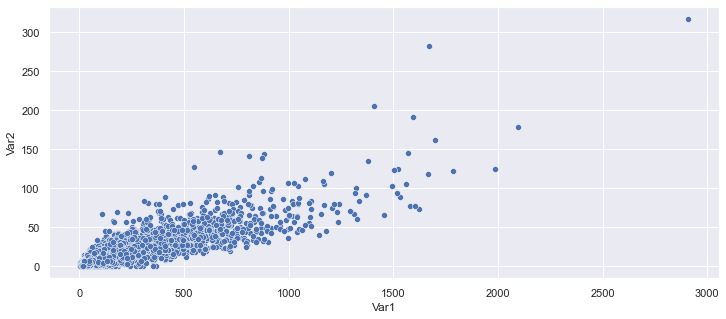

In [18]:
sns.scatterplot(x='Var1',y='Var2',data=data)

- Var1 and Var2 are positively correlated moderately. 

In [19]:
data['Var1'].corr(data['Var2'])

0.8780022484027367

<AxesSubplot:xlabel='Rating', ylabel='count'>

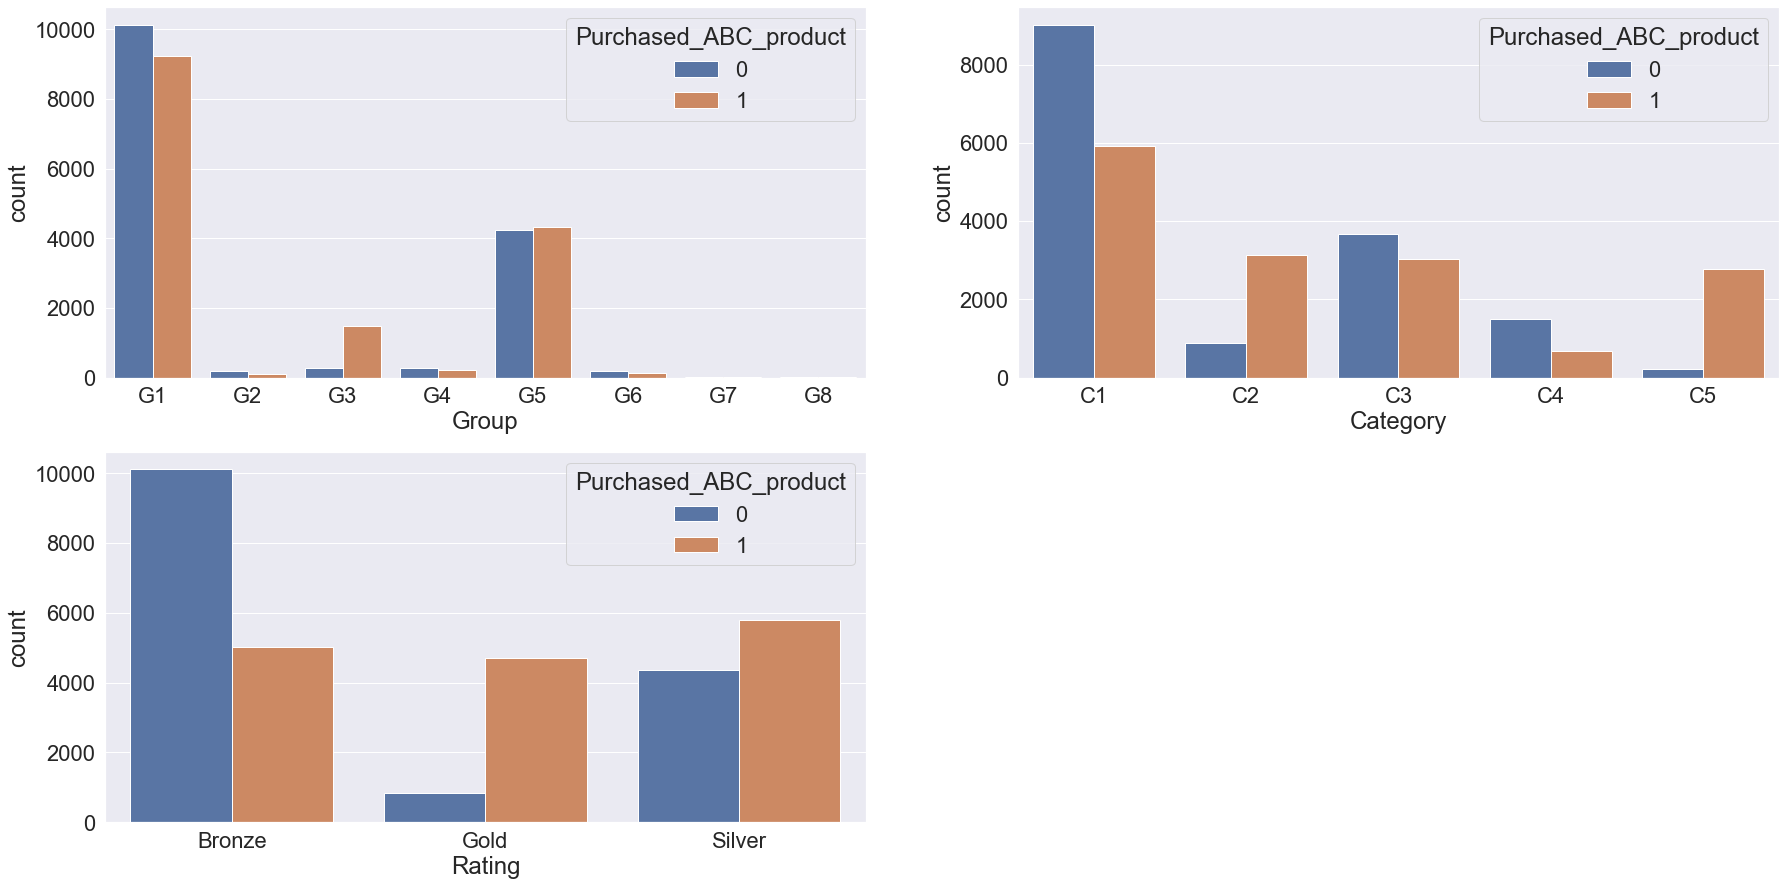

In [20]:
#plot a count plot to see how each categorical feature is associated with the output feature
plt.figure(figsize=(30,15))
sns.set(font_scale=2)
plt.subplot(2,2,1)
sns.countplot(x='Group',hue=data['Purchased_ABC_product'],data = data)

plt.subplot(2,2,2)
sns.countplot(x='Category',hue=data['Purchased_ABC_product'],data = data)

plt.subplot(2,2,3)
sns.countplot(x='Rating',hue=data['Purchased_ABC_product'],data = data)

Observations:
- In groups G3, G5 the number of customers who made purchases are more than the ones who did not purchase. All others have customers who are more inclined towards not purchasing. This means that given a group(G3 or G5) the probability of a customer belonging to this group making a purchase is greater than the probability of not making a purchase. Similarly customer belonging to any group other than G3,G5 has probabilty of not purchasing greater than the probability of making a purchase
- Simiarly categories C2,C5 have customers with dominating ratio of purchase.
- The customers in gold rating have much higher probability of purchase; making a purchase s dominating in silver rating customers also. But in bronze more customers are inclined towards not making a purchase